<h1>Wine Quality Prediction Algorithms</h1>

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import csv

this code modified the 'winequality-red.csv' and 'winequality-white.csv', the original document has 
the values separated through ';' characters, but I think a CSV (comma-separated values) file is 
better suited by being separated by commas. It also makes it easier to handle the data that way.
```
with open('winequality-red.csv', newline='') as csvfile:
    data = csvfile.read().replace(";",",")

with open('winequality-red.csv', "w") as file:
    file.write(data)

with open('winequality-white.csv', newline='') as csvfilewhite:
    data = csvfilewhite.read().replace(";",",")

with open('winequality-white.csv', "w") as whitefile:
    whitefile.write(data)
```

<h1>Working with Red Wines</h1>

First Im going to work with the Multivariant Linear Regression. This is a good idea because we have 
a set of eleven parameters and we want to see how they affect the quality of the wines.


In [3]:
# shows the first five rows of the Red Wines data 
redwines = pd.read_csv("winequality-red.csv")
shape = redwines.shape
print(shape)
head = redwines.head()
print(head)

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

In [4]:
# shows the  columns with the qualities of the red wines
redwines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# I separated the Quality column from the rest of the data
# redata will have the characteristics of the red wine
redata = redwines.drop('quality', axis=1)
# redqual will have the quality of the red wines
redqual = redwines['quality']

In [6]:
print("show first rows of data for red wine")
print(redata.head())
print("show first rows of quality values for red wine")
print(redqual.head())

show first rows of data for red wine
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8

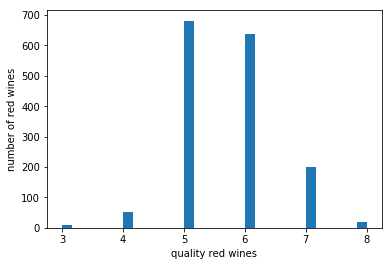

In [7]:
# plot a graph showing the distribution of the wines and their quality
plt.hist(redqual,bins=30)
plt.xlabel("quality red wines");
plt.ylabel("number of red wines")
plt.show()

In [8]:
# imports the seaborn library for creating graphs in python
import seaborn as sns

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


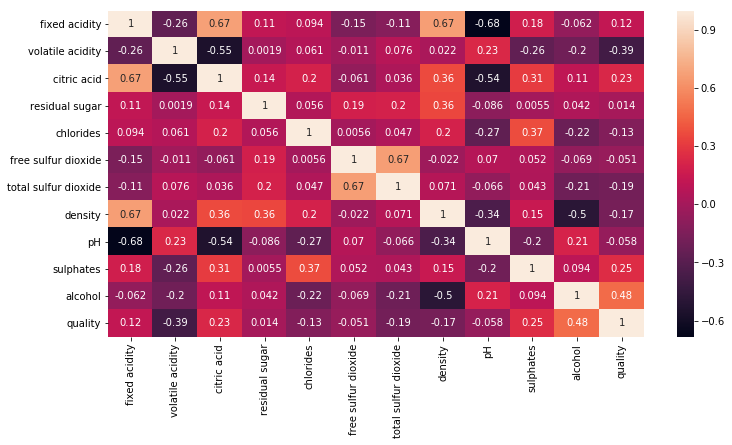

In [9]:
# Shows the coefficient of how much the physico chemical characteristics influence in each other
correlation = redwines.corr()['quality'].drop('quality')
print(correlation)
# plots a heat map showing the influence of the coefficient in each other 
plt.figure(figsize=(12, 6))
sns.heatmap(redwines.corr(), annot=True)
plt.show()

We can see that the influence of volatile acidity on the quality isnot strong, 
but the amount of alcohol has the highest influence on the quality

<h1>Multivariant Linear Regression</h1>

In [10]:
# we use the data splitting method for model from sklearn
from sklearn.model_selection import train_test_split
# we create our data sets for training and testing, 70% of the data will be for training
X_train, X_test, Y_train, Y_test = train_test_split(redata,redqual,train_size=.7)

In [11]:
# we use the LinearRegression function from sklearn
from sklearn.linear_model import LinearRegression
# the multi variable linear regression function
multival_linreg = LinearRegression()
# fitting training data in the function
multival_linreg.fit(X_train,Y_train)
# set of predicted results using test data
testprediction = multival_linreg.predict(X_test)
# first five predictions
print('test prediction: ', testprediction[0:5])
# predicted results using training data
trainprediction = multival_linreg.predict(X_train)
# first five predictions
print('train prediction: ', trainprediction[0:5])

test prediction:  [ 5.90718241  6.12394708  4.81466728  6.66410332  5.37822328]
train prediction:  [ 4.92155644  5.35083771  6.15445502  4.9689363   5.94083941]


In [12]:
# import of mean square error
from sklearn.metrics import mean_squared_error
print("mean squared error")
# mean squared error with the training set
trainrmse = mean_squared_error(trainprediction, Y_train)**0.5
print('train meansquared ', trainrmse)
# mean squared error with the testig set
testrmse = mean_squared_error(testprediction, Y_test)**0.5
print('train meansquared ', testrmse)

mean squared error
train meansquared  0.6353390926
train meansquared  0.673369309243


In [50]:
# rounding the data from the test prediction
preddata = np.round_(testprediction)
print('predicted data from 5 first samples: ', preddata[0:5])
print('real values:\n', redqual[0:6])

predicted data from 5 first samples:  [ 6.  6.  5.  7.  5.]
real values:
 0    5
1    5
2    5
3    6
4    5
5    5
Name: quality, dtype: int64


In [14]:
# regression coefficients
print('coefficient new')
print(multival_linreg.coef_)

coefficient new
[  1.79739990e-02  -9.57201852e-01  -1.01109730e-01  -1.00475023e-03
  -2.01885785e+00   4.53231425e-03  -3.56977671e-03  -1.89419848e+01
  -3.50300118e-01   1.01959216e+00   2.55557702e-01]


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, testprediction))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, testprediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, testprediction)))
print('Accuracy Score:', multival_linreg.score(X_test, Y_test)*100,'%')


Mean Absolute Error: 0.520717816881
Mean Squared Error: 0.45342622663
Root Mean Squared Error: 0.673369309243
Accuracy Score: 36.2353801268 %


Unfortunately it is not very effective for this data base, 
the Mean Squared Error is to high and the Accuracy is too low.

<h1>Working with White Wines</h1>

For the White Wines I'm using the Naive Bayes Algorithm included in the SciKit library.
The Naive Bayes is used for  classification of data. The highest ranking in white wines is 9, so we are going to 
use the ranking as classes and see where each wine can be classified.

In [16]:
whitewines = pd.read_csv("winequality-white.csv")

# shows the first five rows of the White Wines data 
shape = whitewines.shape
print(shape)
head = whitewines.head()
print(head)

(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.

In [17]:
# I separated the Quality column from the rest of the data
# whitedata will have the characteristics of the white wine
whitedata = whitewines.drop('quality', axis=1)
# whitequal will have the quality of the red wines
whitequal = whitewines['quality']

In [18]:
print("show first rows of data for red wine")
print(whitedata[0:5])
print("show first rows of quality values for red wine")
print(whitequal.head())

show first rows of data for red wine
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1

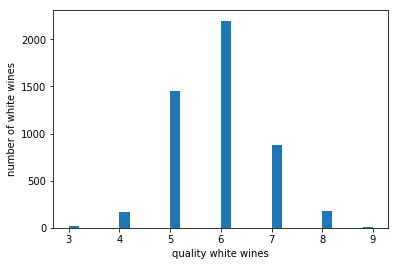

In [19]:
# plot a graph showing the distribution of the wines and their quality
plt.hist(whitequal,bins=30)
plt.xlabel("quality white wines");
plt.ylabel("number of white wines")
plt.show()

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


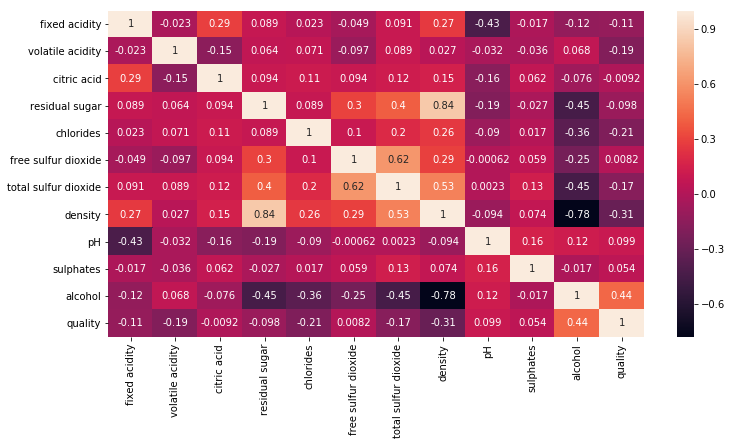

In [20]:
# Shows the coefficient of how much the physico shemical characteristics influence in each other
correlation = whitewines.corr()['quality'].drop('quality')
print(correlation)
# plots a heat map showing the influence of the coefficient in each other 
plt.figure(figsize=(12, 6))
sns.heatmap(whitewines.corr(), annot=True)
plt.show()

We can see that in this example, the density has the least influence in quality,
but alcohol retains the highest level of influence in the quality.

<h2>Naive Bayes Algorithm</h2>

In [41]:
# we create our data sets for training and testing, 70% of the data will be for training
X_train, X_test, Y_train, Y_test = train_test_split(whitedata,whitequal,train_size=.7)

# callling the GaussianNB
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gaussb = GaussianNB()

#Train the model using the training sets
gaussb.fit(X_train, Y_train)

#Predict the response for test dataset
ypred = gaussb.predict(X_test)
print('predictions using test data set')
print('test prediction', ypred[0:5])

# predicted results using training data
predtraining  = gaussb.predict(X_train)
# Predict response for training test
print('training prediction first 5 samples', predtraining[0:5])
print('actual quality values: \n', whitequal[0:5])

predictions using test data set
test prediction [5 7 5 6 7]
training prediction first 5 samples [5 7 4 5 6]
actual quality values: 
 0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


In [35]:
print("Accuracy:",(metrics.accuracy_score(Y_test, ypred))*100,'%')

Accuracy: 46.3945578231 %


In [23]:
print("mean squared error")
# mean squared error with the training set
gtrainrmse = mean_squared_error(predtraining, Y_train)**0.5
print('train meansquared ', gtrainrmse)
# mean squared error with the testig set
gtestrmse = mean_squared_error(ypred, Y_test)**0.5
print('train meansquared ', gtestrmse)

mean squared error
train meansquared  0.957071573952
train meansquared  0.92324479548


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, ypred)))

Mean Absolute Error: 0.634693877551
Mean Squared Error: 0.852380952381
Root Mean Squared Error: 0.92324479548


This algorithm also didn't worked, since the errors percentage is high and the accuracy is below 50%.

<h1>Restructuring The Sample Data</h1>

<h3>The results for the last algorithms have not been effective, 
to fix this we can create new classes based in the range of Quality values to make  the data useful
for class focuses algorithms</h3>

<h1>New Classes for the Red Wines</h1>

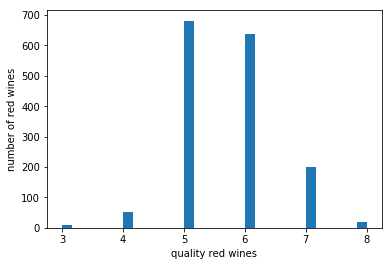

In [25]:
# plot a graph showing the distribution of the wines and their quality
plt.hist(redqual,bins=30)
plt.xlabel("quality red wines");
plt.ylabel("number of red wines")
plt.show()


In [26]:
rquality = redwines["quality"].values
rcategory = []
for num in rquality:
    if num < 5:
        rcategory.append("low")
    elif num > 6:
        rcategory.append("high")
    else:
        rcategory.append("medium")
[(i, rcategory.count(i)) for i in set(rcategory)] 

[('high', 217), ('low', 63), ('medium', 1319)]

In [27]:
rcategory = pd.DataFrame(data=rcategory, columns=["category"])
rdata = pd.concat([redwines, rcategory], axis=1)
rdata.drop(columns="quality", axis=1, inplace=True)
x2 = rdata.iloc[:, :-1].values
y2 = rdata.iloc[:, -1].values 

<h1>Naive Bayes Algorithm with the new Classes</h1>

RED WINES:

In [42]:

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.7)

#Train the model using the training sets
gaussb.fit(X2_train, Y2_train)

#Predict the response for test dataset
y2pred = gaussb.predict(X2_test)
print('predictions using test data set')
print('test prediction', y2pred[0:5])

# predicted results using training data
predtraining2  = gaussb.predict(X2_train)
# Predict response for training test
print('training prediction', predtraining2[0:5])
print('actual data base', rcategory[0:5])

print("Accuracy:",(metrics.accuracy_score(Y2_test, y2pred))*100,'%')

predictions using test data set
test prediction ['medium' 'medium' 'low' 'low' 'medium']
training prediction ['high' 'medium' 'medium' 'medium' 'low']
actual data base   category
0   medium
1   medium
2   medium
3   medium
4   medium
Accuracy: 72.3214285714 %


In [45]:
# confusion matrix Red wines

from sklearn.metrics import confusion_matrix
print('Low Medium High')

cmred = confusion_matrix(rcategory[1:100], predtraining2[1:100], labels=["low", "medium", "high"])
print('confusion matrix Red wines')
print(cmred)

Low Medium High
confusion matrix Red wines
[[ 0  2  5]
 [10 59 18]
 [ 0  4  1]]


WHITE WINES:

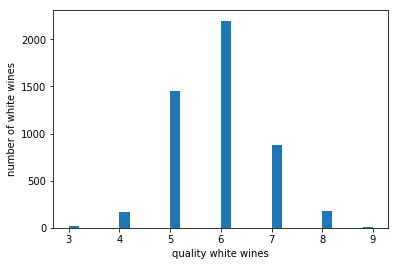

In [30]:
# If we look again at the quality range values of the white wine
plt.hist(whitequal,bins=30)
plt.xlabel("quality white wines");
plt.ylabel("number of white wines")
plt.show()

In [31]:
wquality = whitewines["quality"].values
wcategory = []
for num in wquality:
    if num < 5:
        wcategory.append("low")
    elif num > 7:
        wcategory.append("high")
    else:
        wcategory.append("medium")
[(i, wcategory.count(i)) for i in set(wcategory)] 

[('high', 180), ('low', 183), ('medium', 4535)]

In [32]:
#preparing data for testing
wcategory = pd.DataFrame(data=wcategory, columns=["category"])
wdata = pd.concat([whitewines, wcategory], axis=1)
wdata.drop(columns="quality", axis=1, inplace=True)
x3 = wdata.iloc[:, :-1].values
y3 = wdata.iloc[:, -1].values 

In [46]:

X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size=0.7)

#Train the model using the training sets
gaussb.fit(X3_train, Y3_train)

#Predict the response for test dataset
y3pred = gaussb.predict(X3_test)
print('predictions using test data set for first 5 samples')
print('test prediction', y3pred[0:5])

# predicted results using training data
predtraining3  = gaussb.predict(X3_train)
# Predict response for training test
print('training prediction', predtraining3[0:5])
print('actual data base', wcategory[0:5])

print("Accuracy:",(metrics.accuracy_score(Y3_test, y3pred))*100,'%')

predictions using test data set for first 5 samples
test prediction ['medium' 'medium' 'medium' 'medium' 'medium']
training prediction ['medium' 'low' 'medium' 'medium' 'medium']
actual data base   category
0   medium
1   medium
2   medium
3   medium
4   medium
Accuracy: 88.3056284631 %


In [47]:
# confusion matrix white wines
print('White Wines')
print('Low Medium High')

cmw = confusion_matrix(wcategory[1:100], predtraining3[1:100], labels=["low", "medium", "high"])
print(cmw)

White Wines
Low Medium High
[[ 0  2  0]
 [ 3 82  7]
 [ 0  5  0]]


<h2>The restructuring of classes makes the Naive Bayes Algorithm more effective for both White and Red wines.</h2>